In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [85]:
df = pd.read_csv(r'D:\5.MBAN6110 Data Science I\messy_data.csv')

In [86]:
df

,Age,Income,Gender,Product,Quantity
0,56,59544.57663,Female,D,3
1,46,36399.18997,Female,NaN,1
2,32,57140.63881,Female,D,2
3,60,69554.91903,Male,C,5
4,25,53173.80518,Female,D,2
...,...,...,...,...,...
100,61,37341.55459,Male,D,5
101,55,35516.63492,Female,A,3
102,31,53254.05089,Male,B,2
103,21,NaN,Male,B,2


In [87]:
df.info()
#always start with info() check missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       105 non-null    int64  
 1   Income    94 non-null     float64
 2   Gender    105 non-null    object 
 3   Product   100 non-null    object 
 4   Quantity  105 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 4.2+ KB


In [88]:
df.describe()

,Age,Income,Quantity
count,105.000000,94.000000,105.00000
mean,42.076190,52867.862808,3.20000
std,15.940813,29896.579420,1.44382
min,18.000000,20901.331720,1.00000
25%,31.000000,37814.315255,2.00000
50%,41.000000,48760.369705,3.00000
75%,55.000000,61644.277868,5.00000
max,120.000000,300000.000000,5.00000


In [89]:
df.describe(include ='all')

,Age,Income,Gender,Product,Quantity
count,105.000000,94.000000,105,100,105.00000
unique,NaN,NaN,2,4,NaN
top,NaN,NaN,Female,D,NaN
freq,NaN,NaN,58,28,NaN
mean,42.076190,52867.862808,NaN,NaN,3.20000
std,15.940813,29896.579420,NaN,NaN,1.44382
min,18.000000,20901.331720,NaN,NaN,1.00000
25%,31.000000,37814.315255,NaN,NaN,2.00000
50%,41.000000,48760.369705,NaN,NaN,3.00000
75%,55.000000,61644.277868,NaN,NaN,5.00000


In [8]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [90]:
import seaborn as sns
#visual library with many kinds of plots

<Axes: xlabel='Income', ylabel='Count'>

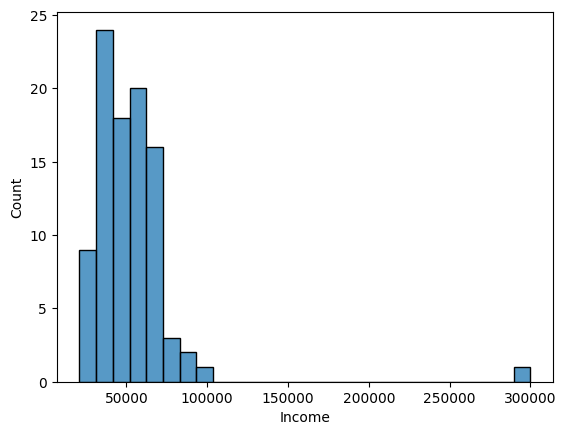

In [91]:
sns.histplot(df['Income'])

<Axes: >

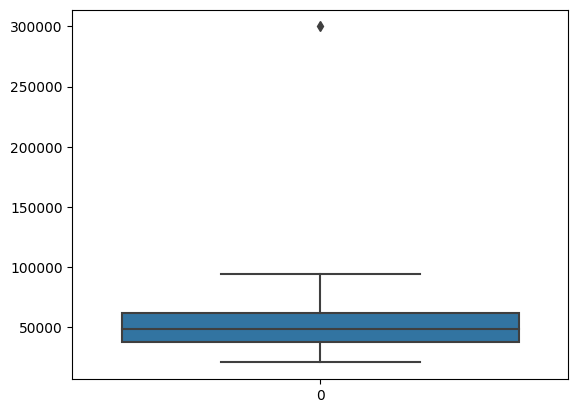

In [92]:
sns.boxplot(df['Income'])

In [93]:
#filter a outlier from index in data
df[df["Income"] == 300000]
df[df['Income']==300000].index
# or use df.drop(df['Income']==300000, inplace=True)
# index = 99 then income is the max

Index([99], dtype='int64')

<Axes: >

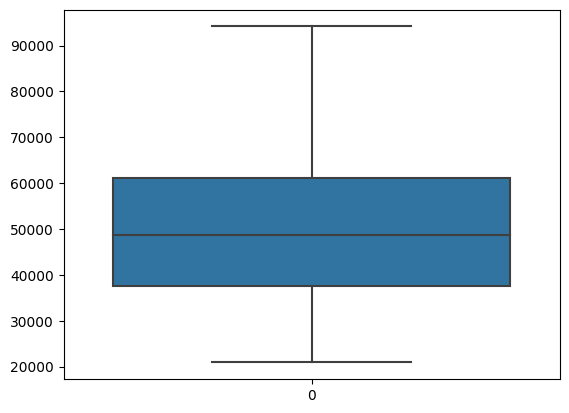

In [94]:
df.drop(99, axis=0, inplace=True)
sns.boxplot(df['Income'])
#remove outlier permentaly

<Axes: xlabel='Income', ylabel='Count'>

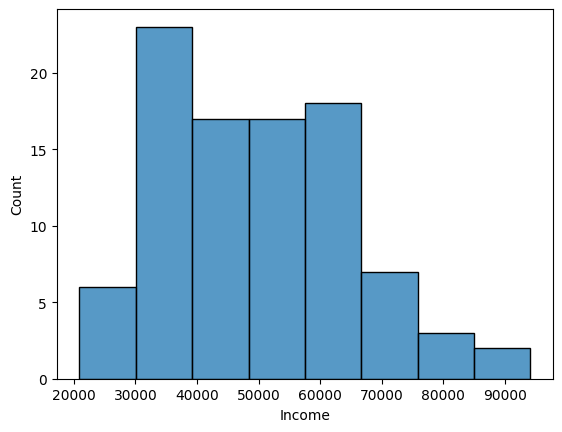

In [95]:
sns.histplot(df['Income']) # more reasonable

<Axes: xlabel='Gender', ylabel='Income'>

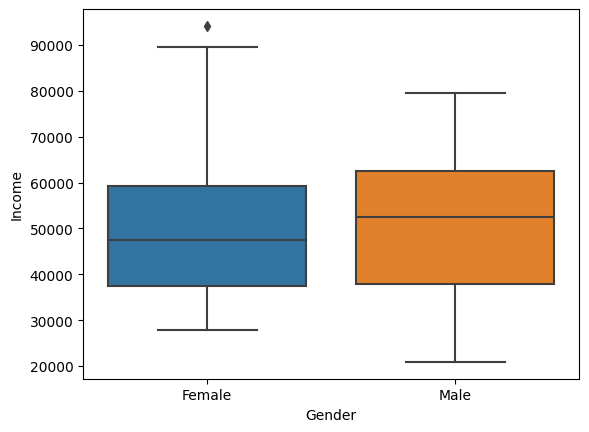

In [96]:
sns.boxplot(data=df, x='Gender', y='Income')
# there is an outlier

<Axes: xlabel='Gender', ylabel='Income'>

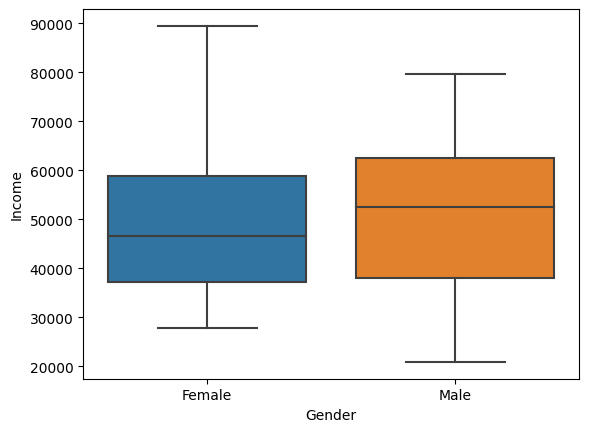

In [72]:
df.drop(df[df['Income']>90000].index, axis=0, inplace=True)
#drop the income outlier that > 90000
sns.boxplot(data=df, x='Gender', y='Income')

<Axes: xlabel='Age', ylabel='Income'>

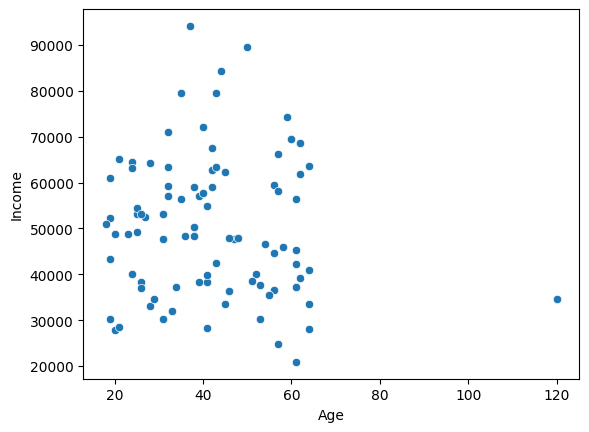

In [71]:
sns.scatterplot(data=df, x='Age', y='Income')

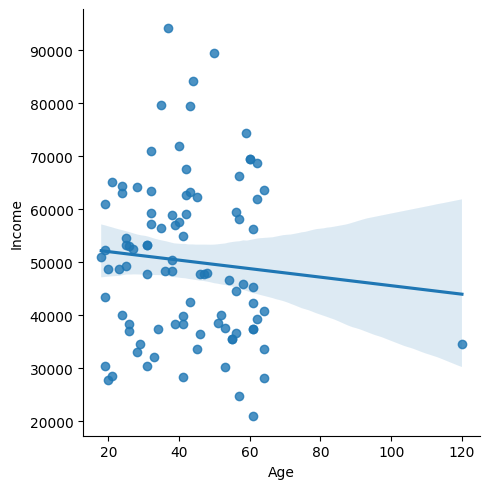

In [17]:
sns.lmplot(data=df, x='Age', y='Income', fit_reg=True)
#fir_reg is trend/ fit line,ci= confidence level

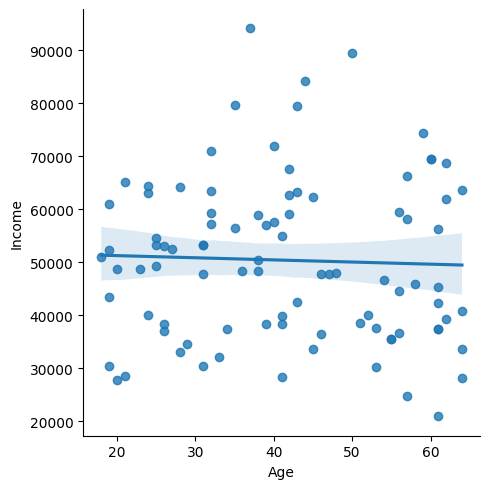

In [18]:
df.drop(df[df['Age']==120].index, axis=0, inplace=True)
# drop an outlier when age == 120
sns.lmplot(data=df, x='Age', y='Income', fit_reg=True)

In [73]:
# drop duplicaties, chongfu de data
df.drop_duplicates(inplace=True)

In [74]:
df.info

<bound method DataFrame.info of     Age       Income  Gender Product  Quantity
0    56  59544.57663  Female       D         3
1    46  36399.18997  Female     NaN         1
2    32  57140.63881  Female       D         2
3    60  69554.91903    Male       C         5
4    25  53173.80518  Female       D         2
..  ...          ...     ...     ...       ...
94   42  67538.11470    Male     NaN         1
95   24  63099.75454  Female       B         5
96   26  53084.75201    Male       D         3
97   41  28347.74972    Male       C         3
98  120  34584.33704  Female       C         5

[98 rows x 5 columns]>

By filling null with other, find null

In [76]:
df['Product'] = df['Product'].fillna('other')
#a way to find missing value

In [77]:
df

,Age,Income,Gender,Product,Quantity
0,56,59544.57663,Female,D,3
1,46,36399.18997,Female,other,1
2,32,57140.63881,Female,D,2
3,60,69554.91903,Male,C,5
4,25,53173.80518,Female,D,2
...,...,...,...,...,...
94,42,67538.11470,Male,other,1
95,24,63099.75454,Female,B,5
96,26,53084.75201,Male,D,3
97,41,28347.74972,Male,C,3


In [83]:
print(df['Product'].unique())

['D' 'other' 'C' 'A' 'B']


In [78]:
# groupby('X')['Y']   X unique as rows. then calculate group value with Y.
df.groupby('Gender')['Income'].mean()

Gender
Female    49060.205227
Male      50795.175595
Name: Income, dtype: float64

In [79]:
df.groupby('Product')['Income'].mean()

Product
A        52599.570360
B        48693.364717
C        50007.724411
D        48553.723717
other    47685.057048
Name: Income, dtype: float64

In [24]:
df['Income']=df['Income'].fillna(df['Income'].mean())

fliter index with a num

In [25]:
df[df['Age']==56].index

Index([0, 6, 41], dtype='int64')

In [97]:
# find null product with their index
df[df['Product'].isnull()]

,Age,Income,Gender,Product,Quantity
1,46,36399.18997,Female,NaN,1
34,64,40845.16974,Female,NaN,2
45,31,30330.13661,Male,NaN,5
86,43,63312.67422,Female,NaN,4
94,42,67538.11470,Male,NaN,1


In [27]:
#find first 5 rows that product == D
df[df['Product'] == 'D'].head()

,Age,Income,Gender,Product,Quantity
0,56,59544.57663,Female,D,3
2,32,57140.63881,Female,D,2
4,25,53173.80518,Female,D,2
6,56,36554.97225,Male,D,1
8,40,72034.11928,Male,D,2


In [98]:
summary_stats_D = df[df['Product'] == 'D'].describe()

In [100]:
summary_stats_D

,Age,Income,Quantity
count,28.000000,26.000000,28.000000
mean,43.107143,49876.379810,2.642857
std,13.982368,14148.860233,1.445665
min,18.000000,28602.816730,1.000000
25%,32.750000,38643.331093,1.750000
50%,41.500000,48629.797555,2.000000
75%,56.250000,57109.709432,4.000000
max,64.000000,94154.951250,5.000000


In [101]:
type(summary_stats_D)

pandas.core.frame.DataFrame

In [102]:
df[df['Income'] > 4000]

,Age,Income,Gender,Product,Quantity
0,56,59544.57663,Female,D,3
1,46,36399.18997,Female,NaN,1
2,32,57140.63881,Female,D,2
3,60,69554.91903,Male,C,5
4,25,53173.80518,Female,D,2
...,...,...,...,...,...
98,120,34584.33704,Female,C,5
100,61,37341.55459,Male,D,5
101,55,35516.63492,Female,A,3
102,31,53254.05089,Male,B,2


--loc selects rows and columns with specific labels
--iloc selects rows and columns at specific integer positions
---if index is default. loc = iloc. if index is changed, use loc with lable to find rows

In [103]:
#print a row when index = 50. 
df.iloc[50]

Age                  45
Income      33556.01307
Gender           Female
Product               C
Quantity              5
Name: 50, dtype: object

In [112]:
df.head()

,Age,Income,Gender,Product,Quantity
0,56,59544.57663,Female,D,3
1,46,36399.18997,Female,NaN,1
2,32,57140.63881,Female,D,2
3,60,69554.91903,Male,C,5
4,25,53173.80518,Female,D,2


In [117]:
#df.loc[3]
df.iloc[3]

Age                  60
Income      69554.91903
Gender             Male
Product               C
Quantity              5
Name: 3, dtype: object

In [106]:
df.set_index('Gender').loc['Female']

,Age,Income,Product,Quantity
Gender,,,,
Female,56,59544.57663,D,3
Female,46,36399.18997,NaN,1
Female,32,57140.63881,D,2
Female,25,53173.80518,D,2
Female,38,58955.66969,A,2
Female,36,48320.18269,A,4
Female,28,33141.52498,D,3
Female,28,64250.08093,B,4
Female,41,NaN,A,5


In [107]:
print(df['Income'].mean(), df['Income'].median())

50210.527999247315 48737.52372


In [118]:
#df[df['Income']]

KeyError: "None of [Index([      59544.57663,       36399.18997,       57140.63881,\n             69554.91903,       53173.80518,       58955.66969,\n             36554.97225,       48320.18269,       72034.11928,\n             33141.52498,\n       ...\n              67538.1147,       63099.75454,       53084.75201,\n             28347.74972,       34584.33704,       37341.55459,\n             35516.63492,       53254.05089, 50994.27810102564,\n             69554.91903],\n      dtype='float64', length=104)] are in the [columns]"

In [119]:
df2 = df.copy()
df2

,Age,Income,Gender,Product,Quantity
0,56,59544.576630,Female,D,3
1,46,36399.189970,Female,NaN,1
2,32,57140.638810,Female,D,2
3,60,69554.919030,Male,C,5
4,25,53173.805180,Female,D,2
...,...,...,...,...,...
100,61,37341.554590,Male,D,5
101,55,35516.634920,Female,A,3
102,31,53254.050890,Male,B,2
103,21,50994.278101,Male,B,2


In [120]:
df2['Income'].mean()

50241.50957378342

In [121]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104 entries, 0 to 104
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       104 non-null    int64  
 1   Income    104 non-null    float64
 2   Gender    104 non-null    object 
 3   Product   99 non-null     object 
 4   Quantity  104 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 8.9+ KB


In [122]:
# if female's income has null values. fill in with mean value
df['Income'] = df['Income'].fillna(df.groupby('Gender')['Income'].transform('mean'))